# Testing calculation from functions

In [1]:
import xarray as xr
import numpy as np
from os.path import expanduser
home = expanduser("~")
import skimage.measure as skm
import matplotlib.pyplot as plt
import timeit

In [2]:
from funcs.aggFuncs import *
from funcs.prFuncs import *
from funcs.vars.myFuncs import *

In [3]:
observations = [
    'GPCP'
    ]
obs = observations[0]

In [4]:
folder = home + '/Documents/data/obs/ds'
fileName = obs + '_precip.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 71, lon: 360, time: 9294)
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Data variables:
    precip   (time, lat, lon) float32 ...

In [5]:
precip = ds.precip
precip

<xarray.DataArray 'precip' (time: 9294, lat: 71, lon: 360)>
[237554640 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean
    coordinates:    time latitude longitude

In [7]:
start = timeit.default_timer()
pr_percentiles = calc_pr_percentiles(precip)
stop = timeit.default_timer()
print('{} took {} seconds to finsih'.format(obs, (stop-start)))

GPCP took 0.10581679721666669 seconds to finsih


In [8]:
pr_percentiles

<xarray.Dataset>
Dimensions:  (time: 9294)
Coordinates:
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Data variables:
    pr95     (time) float64 17.75 18.43 17.45 16.35 ... 17.24 17.49 16.04 16.1
    pr97     (time) float64 22.97 22.63 22.75 21.32 ... 21.89 22.22 20.54 20.22
    pr99     (time) float64 34.5 33.05 32.71 32.32 ... 31.05 31.92 29.41 28.63
    pr999    (time) float64 59.23 63.93 55.71 51.78 ... 51.35 61.91 46.31 44.31

In [6]:
start = timeit.default_timer()
rxday = calc_rxday(precip)
stop = timeit.default_timer()
print('{} took {} seconds to finsih'.format(obs, (stop-start)))

GPCP took 2.3298354999999997 seconds to finsih


In [13]:
folder = home + '/Documents/data/obs/' + obs
fileName = obs + '_rxday.nc'
save_file(rxday, folder, fileName)

In [ ]:
threshold_options = [
    # 'pr95',
    'pr97',
    # 'pr99',
    # 'pr999',
    ]
threshold_option = threshold_options[0]
conv_threshold = pr_percentiles[threshold_option].mean(dim='time')
conv_threshold

In [ ]:
start = timeit.default_timer()
rome = calc_rome(precip.isel(time=slice(1,10)), conv_threshold)
stop = timeit.default_timer()
print('it takes {} minutes to calculate rome for {}'.format((stop-start)/60, obs))

it takes 1.6405123645833333 minutes to calculate rome for model: GPCP


Text(0.5, 0, 'day')

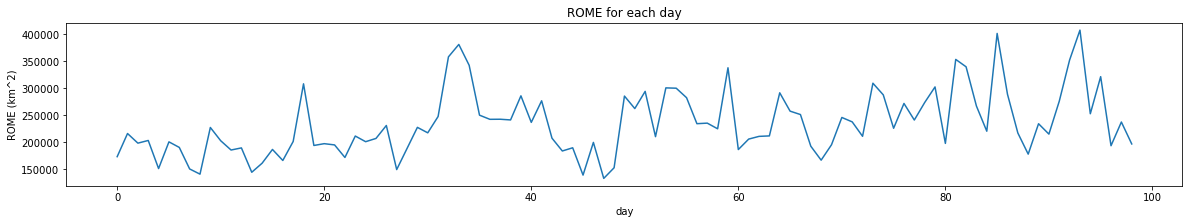

In [ ]:
plt.figure(figsize = (20,3))
plt.plot(rome)
plt.title('ROME for each day')
plt.ylabel('ROME (km^2)')
plt.xlabel('day')